In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


## Cleaning Data

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
print(data['Gender'].mode())
print(data['Married'].mode())
print(data['Dependents'].mode())
print(data['Self_Employed'].mode())

0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    0
Name: Dependents, dtype: object
0    No
Name: Self_Employed, dtype: object


In [6]:
print(data['Dependents'].unique())

['0' '1' '2' '3+' nan]


In [7]:
data["Credit_History"].values

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., nan,  0.,  1.,  1.,  0.,  1.,  0.,  0., nan,  1.,
        1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        0., nan,  1.,  1.,  1., nan,  1.,  1., nan,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
       nan,  1.,  1.,  1.,  1.,  0.,  1.,  1., nan,  1.,  1.,  0., nan,
       nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
       nan,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0

In [8]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
data["Married"].fillna(data["Married"].mode()[0], inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
print("the maximum Loan Amount is {}".format(data['LoanAmount'].max()))
print("the mean Loan Amount is {}".format(int(data['LoanAmount'].mean())))
print("the minimum Loan Amount is {}".format(data['LoanAmount'].min()))

the maximum Loan Amount is 700.0
the mean Loan Amount is 146
the minimum Loan Amount is 9.0


In [11]:
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data = data.drop('Loan_ID', axis=1)

## Exploratory Data Analysis

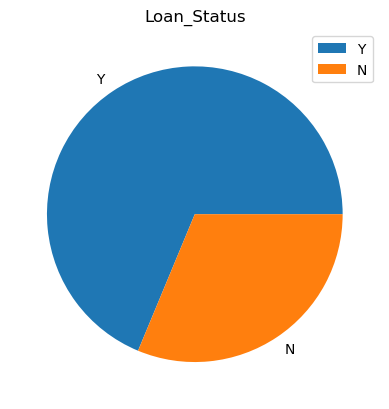

In [14]:
loan_status_count = data["Loan_Status"].value_counts()
plt.pie(x = loan_status_count,
       labels=loan_status_count.index,
       )
plt.legend()
plt.title("Loan_Status")
plt.show()


In [15]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Gender')

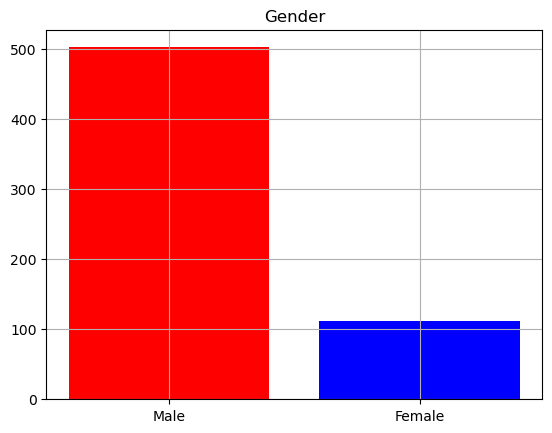

In [16]:
gender_count = data["Gender"].value_counts()
plt.bar(x=gender_count.index, height=gender_count, color=['red', 'blue'])
# plt.grid(color='gray', linestyle='--', linewidth=1)
plt.grid()
plt.title('Gender')

In [17]:
gender_count

Male      502
Female    112
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Married')

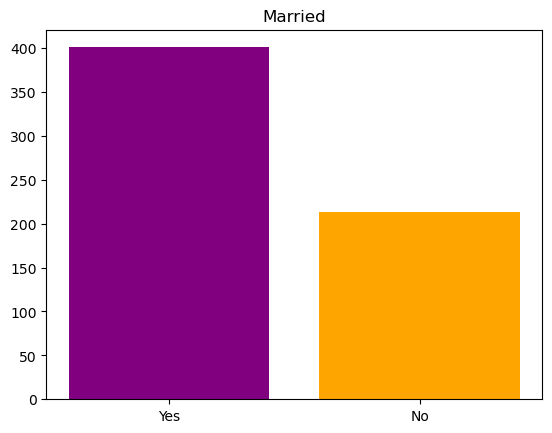

In [18]:
married_count = data["Married"].value_counts()
plt.bar(x=married_count.index, height=married_count, color=['purple', 'orange'])
plt.title("Married")

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


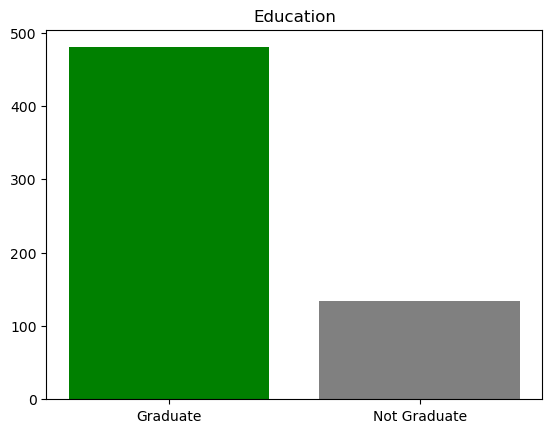

In [20]:
education_count = data["Education"].value_counts()
plt.bar(x=education_count.index, height=education_count, color=['green', 'gray'])
plt.title("Education");

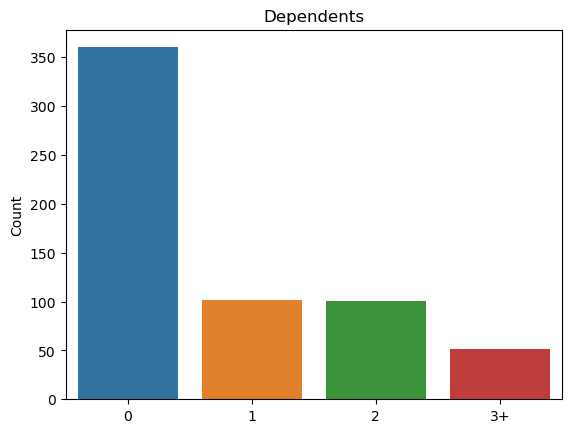

In [208]:
dependents_count = data["Dependents"].value_counts()
sns.barplot(x=dependents_count.index, y=dependents_count)
plt.title("Dependents")
plt.ylabel('Count');

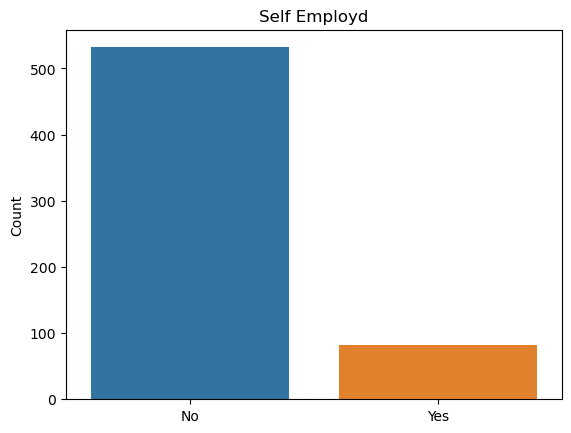

In [209]:
selfemployd_count = data["Self_Employed"].value_counts()
sns.barplot(x=selfemployd_count.index, y=selfemployd_count)
plt.title("Self Employd")
plt.ylabel('Count');

<Axes: ylabel='ApplicantIncome'>

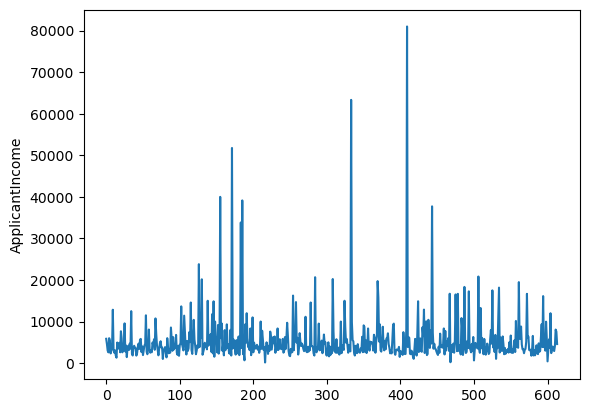

In [210]:
sns.lineplot(data, x=data.index, y=data['ApplicantIncome'])

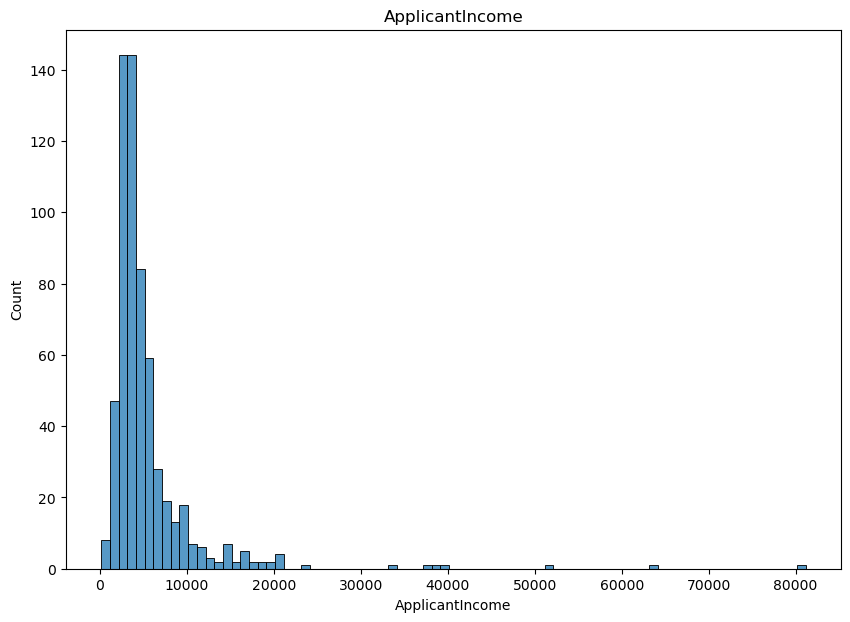

In [254]:
plt.figure(figsize=(10, 7))
sns.histplot(x=data['ApplicantIncome'], binwidth=1000)
plt.title("ApplicantIncome");

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

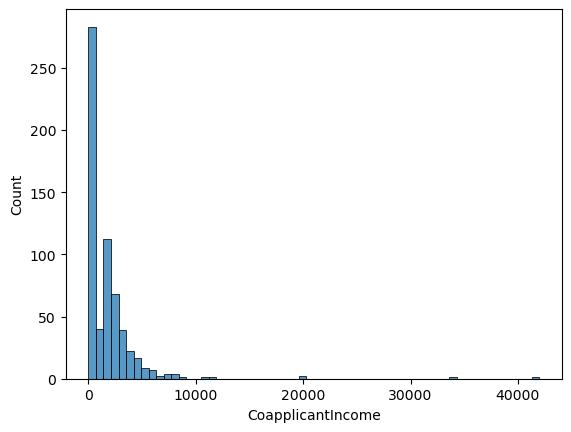

In [256]:
sns.histplot(x=data['CoapplicantIncome'], binwidth=700)

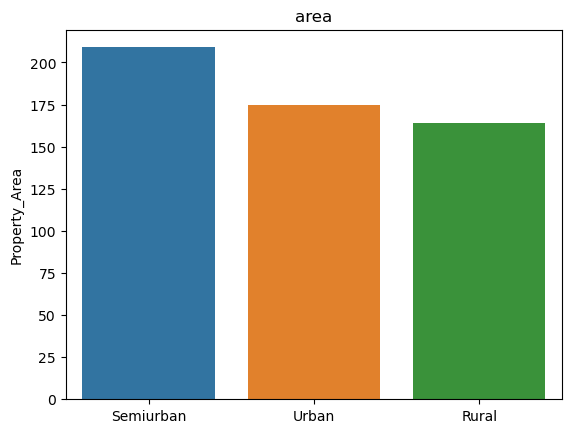

In [305]:
area_count = data["Property_Area"].value_counts()
sns.barplot(x=area_count.index, y=area_count)
plt.title("area");

Text(0.5, 1.0, 'Loan Status vs ApplicantIncome')

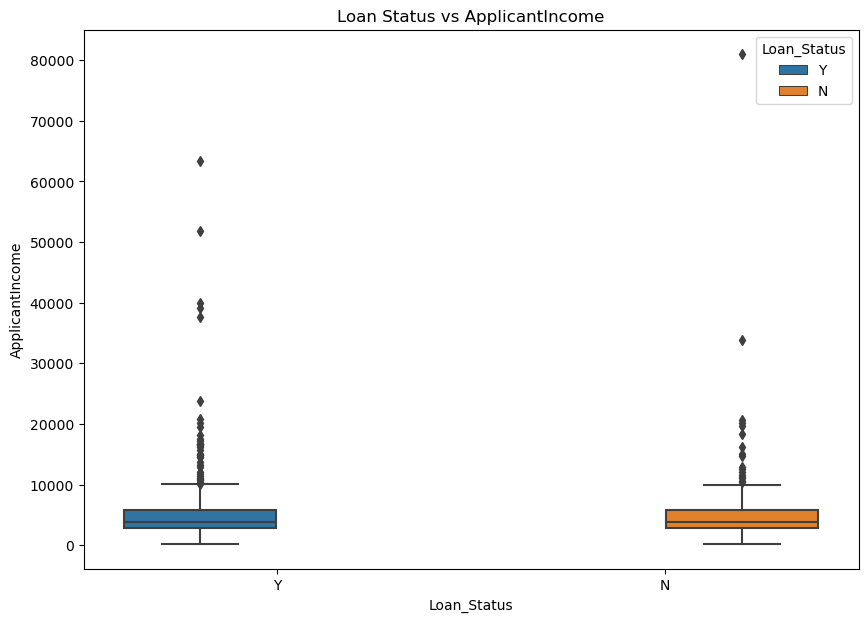

In [268]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x='Loan_Status', y='ApplicantIncome', hue=data['Loan_Status'])
plt.title("Loan Status vs ApplicantIncome")

The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [270]:
# Calculate the IQR
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]

Text(0.5, 1.0, 'Loan Status vs ApplicantIncome')

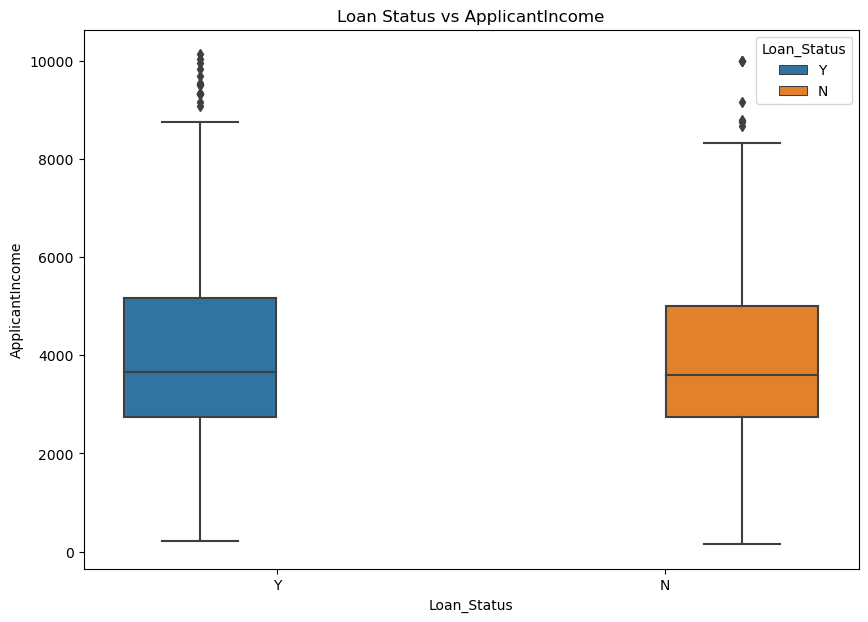

In [271]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x='Loan_Status', y='ApplicantIncome', hue=data['Loan_Status'])
plt.title("Loan Status vs ApplicantIncome")

Text(0.5, 1.0, 'Loan Status vs CoapplicantIncome')

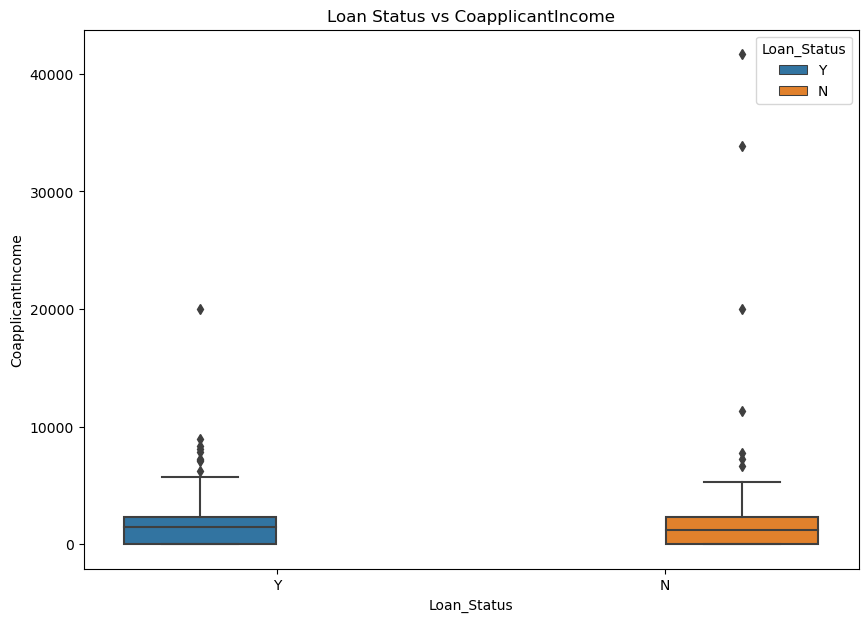

In [274]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x='Loan_Status', y='CoapplicantIncome', hue=data['Loan_Status'])
plt.title("Loan Status vs CoapplicantIncome")

In [275]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['CoapplicantIncome'] >= lower_bound) & (data['CoapplicantIncome'] <= upper_bound)]

Text(0.5, 1.0, 'Loan Status vs CoapplicantIncome')

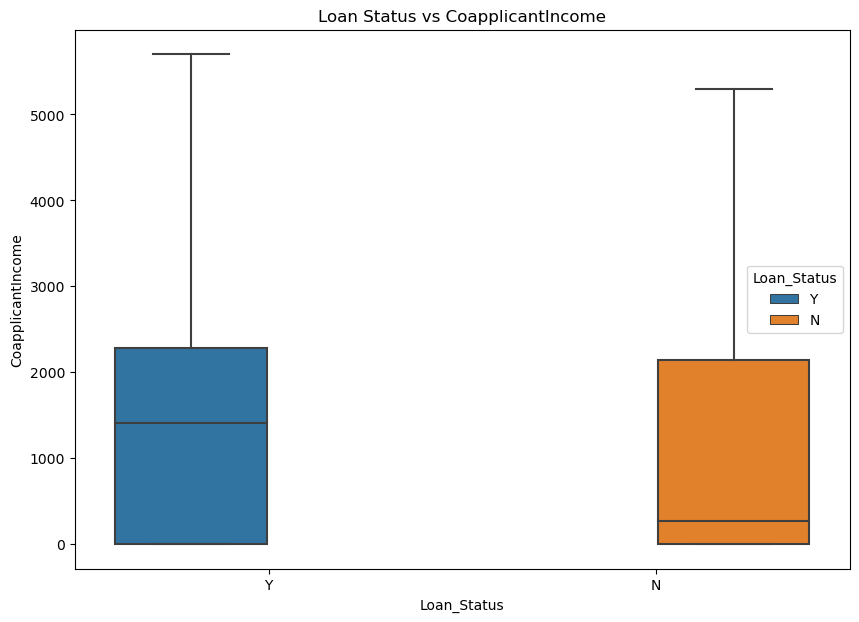

In [276]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x='Loan_Status', y='CoapplicantIncome', hue=data['Loan_Status'])
plt.title("Loan Status vs CoapplicantIncome")

Text(0.5, 1.0, 'Loan Status vs LoanAmount')

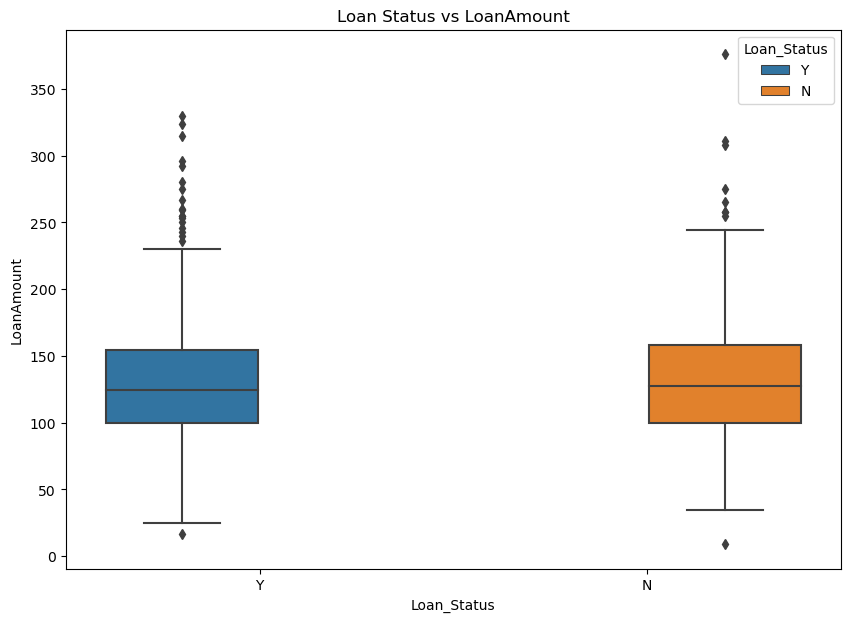

In [277]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x='Loan_Status', y='LoanAmount', hue=data['Loan_Status'])
plt.title("Loan Status vs LoanAmount")

Now let’s have a look at the relationship between credit history and loan status:

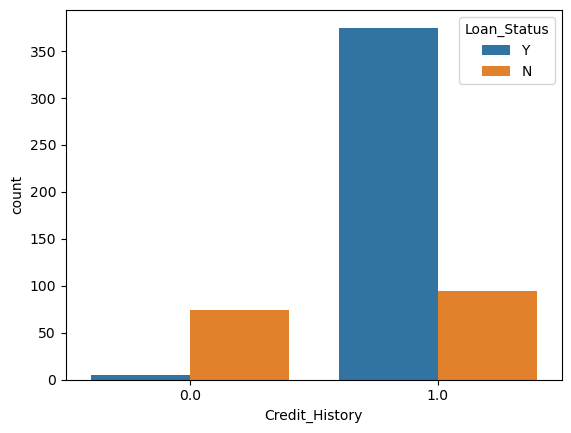

In [307]:
sns.countplot(data, x='Credit_History', hue='Loan_Status');
# sns.barplot(x=(data['Loan_Status'] =='N'), y=data['Credit_History'], hue=data['Loan_Status'])

<Axes: xlabel='Property_Area', ylabel='count'>

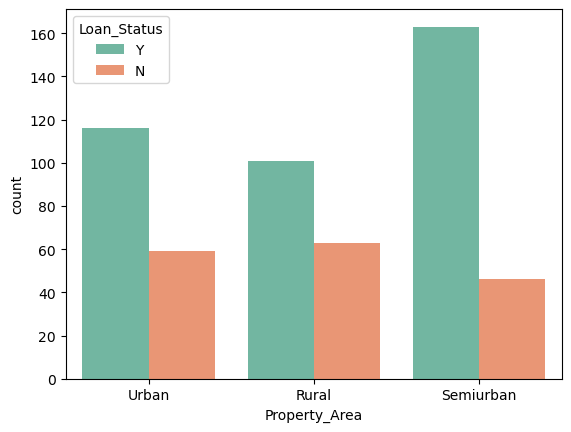

In [329]:
sns.countplot(data, x='Property_Area', hue='Loan_Status', palette='Set2')

- convert categorical columns into numerical ones;
- split the data into training and test sets;
- scale the numerical features;
- train the loan approval prediction model.

In [338]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [359]:
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data=data, columns=cat_features)

from sklearn.model_selection import train_test_split
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.fit_transform(X_test[num_features])
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [360]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [361]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.94      0.49      0.64        35
           Y       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [363]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
X_test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
277,-0.520221,-0.052125,-0.967881,0.014215,0.442326,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
84,-0.097903,-0.939288,-1.530701,-3.113045,0.442326,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,Y
275,-0.688670,0.317753,-0.311257,0.014215,0.442326,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,Y
392,-0.768362,0.504057,-0.217453,0.014215,0.442326,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
537,-0.274942,-0.939288,-0.461342,0.014215,0.442326,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,Y
